In [1]:
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras import optimizers
from keras.objectives import categorical_crossentropy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Create Data

In [2]:
def gen_1d_regression_data(n=40, xstart=5, xend=10, m=.5, c=2, mu=0, sigma=.4):
    x = np.linspace(xstart, xend, n)
    y = m * x + c + np.random.normal(mu, sigma, n)
    return x, y

def draw_line(n=40, xstart=5, xend=10, m=.5, c=2,):
    x = np.linspace(xstart, xend, n)
    y = m * x + c
    return x, y 

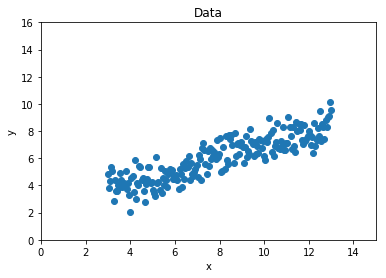

In [3]:
np.random.seed(0)

n = 200
X_data, y_data = gen_1d_regression_data(n=n, sigma=.78, xstart=3, xend=13)

plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0,15,0,16])
plt.scatter(X_data, y_data)

In [11]:
def linear_regression_vector_calculus(x, y):
    X = np.ones([len(x), 2])
    X[:,1] = x
    Y = np.ones([len(y), 1])
    Y[:,0] = y

    XtX = np.dot(X.T, X)
    XtY = np.dot(X.T, Y)

    theta = np.dot(np.linalg.inv(XtX), XtY)
    return theta[0], theta[1]

In [4]:
# Shuffle the training set
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation]
    shuffled_labels = labels[permutation]
    
    return shuffled_dataset, shuffled_labels

In [5]:
# Randomize data
dataset, labels = randomize(X_data, y_data)

# 20% for testing
x_train = dataset[0:160]
y_train = labels[0:160]
x_test  = dataset[160:200]
y_test  = labels[160:200]

## Using Vector Calculus

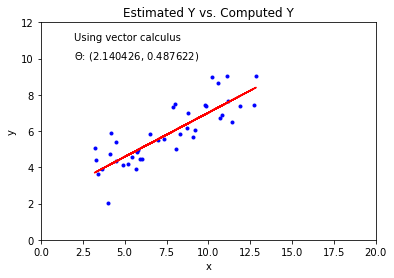

In [15]:
t0, t1 = linear_regression_vector_calculus(x_train, y_train)
y_estimate = t0 + t1*x_test

plt.title('Estimated Y vs. Computed Y')
plt.text(2, 11, 'Using vector calculus')
plt.text(2, 10, '$\Theta$: (%f, %f)' % (t0, t1))
plt.axis([0,20,0,12])
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_test, y_test,'b.')
plt.plot(x_test, y_estimate,'r')

In [16]:
total_test_error = 0

for i in range(len(y_estimate)):
    error = y_test[i] - y_estimate[i]
    #print(error)
    total_test_error += error

total_test_error = np.round(total_test_error/20)
print('Total Test Error:', total_test_error)

('Total Test Error:', 0.0)


## Using SGD in Keras.

In [6]:
def Linear_Regression():
    # create model
    model = Sequential()
    model.add(Dense(1, input_shape=(1,)))
    return model

In [7]:
model = Linear_Regression()

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile model
sgd = optimizers.SGD(lr=0.005)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [10]:
model.fit(x_train, y_train, nb_epoch=80, batch_size=50, verbose=1, shuffle=True) 

Epoch 1/80
160/160 [==============================] - 0s - loss: 3.1576     
Epoch 2/80
160/160 [==============================] - 0s - loss: 1.1732     
Epoch 3/80
160/160 [==============================] - 0s - loss: 1.1237     
Epoch 4/80
160/160 [==============================] - 0s - loss: 1.1627     
Epoch 5/80
160/160 [==============================] - 0s - loss: 1.1396     
Epoch 6/80
160/160 [==============================] - 0s - loss: 1.1087     
Epoch 7/80
160/160 [==============================] - 0s - loss: 1.1159     
Epoch 8/80
160/160 [==============================] - 0s - loss: 1.1270     
Epoch 9/80
160/160 [==============================] - 0s - loss: 1.1601     
Epoch 10/80
160/160 [==============================] - 0s - loss: 1.0891     
Epoch 11/80
160/160 [==============================] - 0s - loss: 1.0991     
Epoch 12/80
160/160 [==============================] - 0s - loss: 1.1044     
Epoch 13/80
160/160 [==============================] - 0s - loss: 1.1034 

/Users/faisal/anaconda/lib/python2.7/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


160/160 [==============================] - 0s - loss: 1.0429     
Epoch 22/80
160/160 [==============================] - 0s - loss: 1.0424     
Epoch 23/80
160/160 [==============================] - 0s - loss: 1.0328     
Epoch 24/80
160/160 [==============================] - 0s - loss: 1.0830     
Epoch 25/80
160/160 [==============================] - 0s - loss: 1.0250     
Epoch 26/80
160/160 [==============================] - 0s - loss: 1.0465     
Epoch 27/80
160/160 [==============================] - 0s - loss: 1.0382     
Epoch 28/80
160/160 [==============================] - 0s - loss: 1.0301     
Epoch 29/80
160/160 [==============================] - 0s - loss: 1.0267     
Epoch 30/80
160/160 [==============================] - 0s - loss: 1.0976     
Epoch 31/80
160/160 [==============================] - 0s - loss: 1.0215     
Epoch 32/80
160/160 [==============================] - 0s - loss: 1.0144     
Epoch 33/80
160/160 [==============================] - 0s - loss: 0.9984    

In [11]:
predictions = model.predict(x_test, batch_size=20, verbose=0)

In [12]:
total_test_error = 0

for i in range(len(predictions)):
    error = y_test[i] - predictions[i][0]
    #print(error)
    total_test_error += error

total_test_error = total_test_error/20
print('Total Test Error:', total_test_error)

('Total Test Error:', 0.60540084377251668)


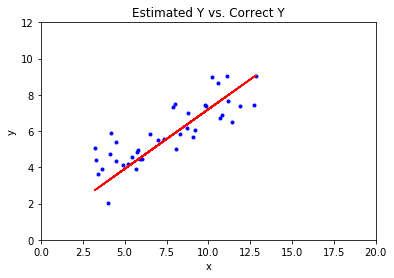

In [13]:
plt.title('Estimated Y vs. Correct Y')
plt.axis([0,20,0,12])
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_test, y_test,'b.')
plt.plot(x_test, predictions,'r')